In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes2.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Checking for null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [36]:
cor_mat=x.corr()

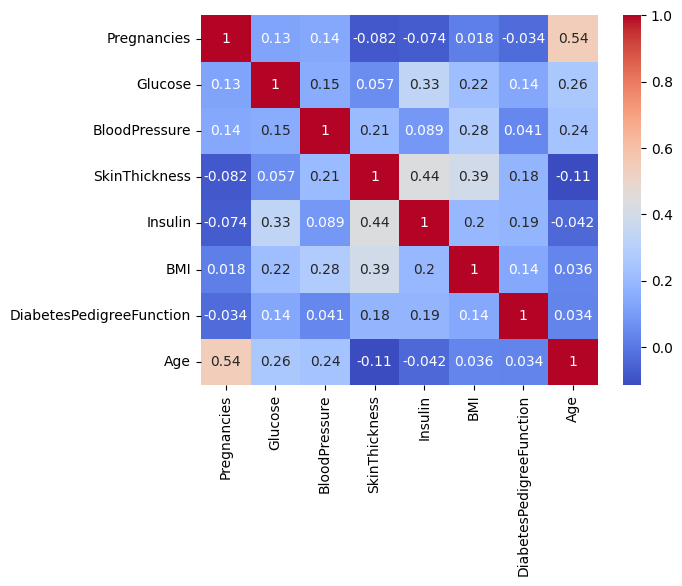

In [41]:
sns.heatmap(cor_mat,cmap='coolwarm',annot=True)
plt.show()

In [42]:
cor_mat_full=df.corr()

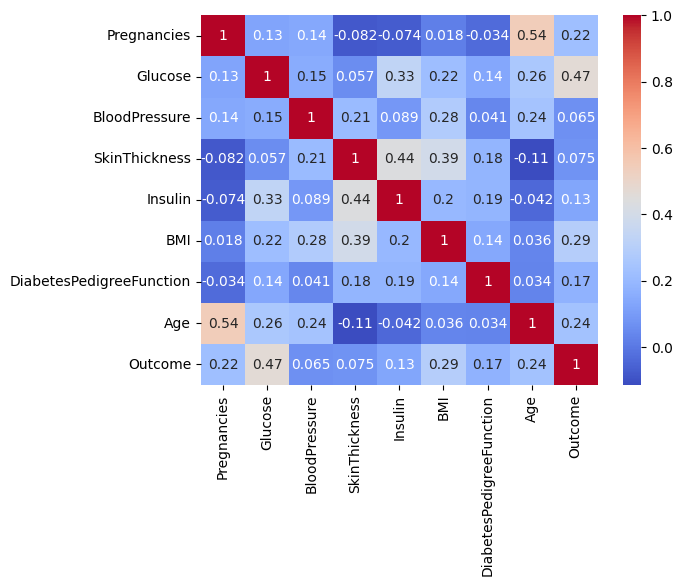

In [43]:
sns.heatmap(cor_mat_full,cmap='coolwarm',annot=True)
plt.show()

Data preparation
==

In [17]:
# Spiliting data into input and target
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [15]:
#Spiliting into test and train data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

Model building
==

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\suryasu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\suryasu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred=log_reg.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print('accuracy_score:',accuracy_score(y_test,y_pred))
print('classification_report:',classification_report(y_test,y_pred))

accuracy_score: 0.7229437229437229
classification_report:               precision    recall  f1-score   support

           0       0.74      0.85      0.79       142
           1       0.69      0.52      0.59        89

    accuracy                           0.72       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.72      0.71       231



In [21]:
print(confusion_matrix(y_test,y_pred))

[[121  21]
 [ 43  46]]


-----------------------
==

Trial 2 with Standardisation
==

In [23]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train_scaled=sc.fit_transform(x_train)

In [24]:
x_test_scaled=sc.transform(x_test)

In [26]:
log_reg_2=LogisticRegression()

log_reg_2.fit(x_train_scaled,y_train)

C:\Users\suryasu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [29]:
y_pred_2=log_reg_2.predict(x_test_scaled)

In [30]:
print('accuracy_score:',accuracy_score(y_test,y_pred_2))
print('classification_report:',classification_report(y_test,y_pred_2))

accuracy_score: 0.7445887445887446
classification_report:               precision    recall  f1-score   support

           0       0.75      0.87      0.81       142
           1       0.73      0.54      0.62        89

    accuracy                           0.74       231
   macro avg       0.74      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [31]:
print(confusion_matrix(y_test,y_pred_2))

[[124  18]
 [ 41  48]]


----------------------------------------

Trial 3 - removing few columns with very low corelation
===

In [45]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [46]:
#dropping BloodPressure and SkinThickness columns

x_new=x.drop(columns={'BloodPressure','SkinThickness'})

In [47]:
x_new

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63
764,2,122,0,36.8,0.340,27
765,5,121,112,26.2,0.245,30
766,1,126,0,30.1,0.349,47


In [48]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [49]:
#splitting train and test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.3,random_state=40)

In [50]:
#standardisation

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train_scal=sc.fit_transform(x_train)
x_test_scal=sc.transform(x_test)

In [51]:
logistic_regress_model=LogisticRegression()

logistic_regress_model.fit(x_train_scal,y_train)

LogisticRegression()

In [52]:
y_predicted=logistic_regress_model.predict(x_test_scal)

In [55]:
 print('accuracy_score:',accuracy_score(y_test,y_predicted))
print('classification_report:',classification_report(y_test,y_predicted))

accuracy_score: 0.7575757575757576
classification_report:               precision    recall  f1-score   support

           0       0.76      0.89      0.82       142
           1       0.76      0.54      0.63        89

    accuracy                           0.76       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.76      0.76      0.75       231

